In this dataset we explore the dataset a little. 

This is done based on:https://medium.com/epfl-extension-school/advanced-exploratory-data-analysis-eda-with-python-536fa83c578a

In [39]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas import DataFrame
import random
import copy
import seaborn as sns

In [3]:
from os import listdir
from os.path import isfile, join
mypath=r"../data/"
onlyfiles = [listdir(mypath)]
print(onlyfiles)

[['sepsis_final_data_withTimes.csv']]


In [4]:
df = pd.read_csv(r"../data/sepsis_final_data_withTimes.csv")

# Structural Analyses

In [5]:
df.shape

(256098, 54)

In [6]:
pd.value_counts(df.dtypes)

float64    51
int64       3
dtype: int64

We can see that we have no numerical features. Allthough this might be correct on paper, we should be warry about that, since features like "Gender" are not numerical, although they are displayed this way.

In [14]:
df.head()

,traj,step,m:presumed_onset,m:charttime,m:icustayid,o:gender,o:mechvent,o:max_dose_vaso,o:re_admission,o:age,...,o:SGOT,o:SGPT,o:Total_bili,o:INR,o:input_total,o:input_4hourly,o:output_total,o:output_4hourly,a:action,r:reward
0,1,0,7.245590e+09,7.245486e+09,200003.0,-0.5,-0.5,-2.302585,-0.5,-0.975798,...,0.338959,0.157965,-0.500365,-0.218993,0.768941,0.261902,0.783054,0.687331,10,0.0
1,1,1,7.245590e+09,7.245500e+09,200003.0,-0.5,-0.5,-2.302585,-0.5,-0.975798,...,-0.187354,-0.179660,1.685584,-0.959725,0.774064,0.261902,0.790869,0.579335,10,0.0
2,1,2,7.245590e+09,7.245515e+09,200003.0,-0.5,-0.5,-2.302585,-0.5,-0.975798,...,-0.187354,-0.179660,1.685584,-0.959725,0.779148,0.261902,0.796727,0.498449,10,0.0
3,1,3,7.245590e+09,7.245529e+09,200003.0,-0.5,-0.5,-2.302585,-0.5,-0.975798,...,-0.187354,-0.179660,1.685584,-0.218993,0.784194,0.261902,0.803687,0.557687,10,0.0
4,1,4,7.245590e+09,7.245544e+09,200003.0,-0.5,-0.5,-2.302585,-0.5,-0.975798,...,-0.187354,-0.179660,1.685584,-0.218993,0.789203,0.261902,0.814416,0.698847,10,0.0


In [17]:
df.describe(percentiles=[.5])

,traj,step,m:presumed_onset,m:charttime,m:icustayid,o:gender,o:mechvent,o:max_dose_vaso,o:re_admission,o:age,...,o:SGOT,o:SGPT,o:Total_bili,o:INR,o:input_total,o:input_4hourly,o:output_total,o:output_4hourly,a:action,r:reward
count,256098.000000,256098.000000,2.560980e+05,2.560980e+05,256098.000000,256098.000000,256098.000000,256098.000000,256098.000000,2.560980e+05,...,2.560980e+05,2.560980e+05,2.560980e+05,2.560980e+05,2.560980e+05,2.560980e+05,2.560980e+05,2.560980e+05,256098.000000,256098.000000
mean,9793.295352,6.963186,5.733706e+09,5.733755e+09,249904.553249,-0.058357,-0.131743,-2.125857,-0.426423,-2.792252e-16,...,6.654469e-15,-9.455402e-16,-5.343892e-15,-5.414417e-15,-1.537329e-15,-8.570590e-17,8.915061e-16,1.799844e-15,9.417301,0.061926
std,5658.983836,4.976085,9.169030e+08,9.169029e+08,28843.500646,0.496584,0.482333,0.519238,0.261082,1.000002e+00,...,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,2.000004e+00,1.000002e+00,1.000002e+00,1.000002e+00,7.682101,0.269765
min,1.000000,0.000000,4.116096e+09,4.116043e+09,200003.000000,-0.500000,-0.500000,-2.302585,-0.500000,-2.789765e+00,...,-5.864356e+00,-5.224668e+00,-2.298223e+00,-8.324894e+00,-6.673386e+00,-1.507055e+00,-2.709603e+00,-1.924168e+00,0.000000,-1.000000
50%,9783.000000,6.000000,5.732035e+09,5.732161e+09,250175.000000,-0.500000,-0.500000,-2.302585,-0.500000,8.580840e-02,...,-2.127615e-01,-2.095274e-01,-2.117032e-01,-2.189928e-01,5.640281e-01,3.023597e-01,2.646228e-01,4.248753e-01,10.000000,0.000000
max,19619.000000,19.000000,7.593437e+09,7.593608e+09,299995.000000,0.500000,0.500000,5.167212,0.500000,1.607008e+00,...,5.127808e+00,4.918135e+00,4.551764e+00,7.642362e+00,3.373051e+00,1.768991e+00,1.724981e+00,1.595654e+00,24.000000,1.000000


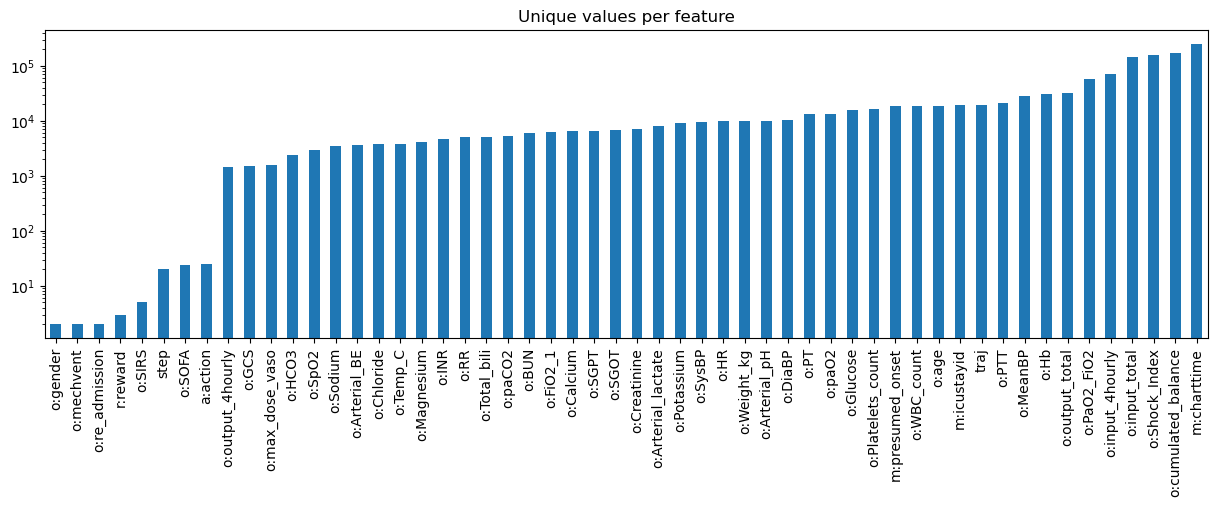

In [16]:
#For each numerical feature compute number of unique entries
unique_values = df.select_dtypes(include="number").nunique().sort_values()

# Plot information with y-axis in log-scale
unique_values.plot.bar(logy=True, figsize=(15, 4),title="Unique values per feature");

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 256098 entries, 0 to 256097
Data columns (total 54 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   traj                 256098 non-null  int64  
 1   step                 256098 non-null  int64  
 2   m:presumed_onset     256098 non-null  float64
 3   m:charttime          256098 non-null  float64
 4   m:icustayid          256098 non-null  float64
 5   o:gender             256098 non-null  float64
 6   o:mechvent           256098 non-null  float64
 7   o:max_dose_vaso      256098 non-null  float64
 8   o:re_admission       256098 non-null  float64
 9   o:age                256098 non-null  float64
 10  o:Weight_kg          256098 non-null  float64
 11  o:GCS                256098 non-null  float64
 12  o:HR                 256098 non-null  float64
 13  o:SysBP              256098 non-null  float64
 14  o:MeanBP             256098 non-null  float64
 15  o:DiaBP          

# Quality Investigation

## Duplicates:

In [18]:
df.shape

(256098, 54)

In [22]:
# Check number of duplicates while ignoring the index feature
n_duplicates = df.drop(labels=["m:icustayid"], axis=1).duplicated().sum()
print(f"You seem to have {n_duplicates} duplicates in your database.")


#  Extract column names of all features, except 'Accident_Index'
columns_to_consider = df.drop(labels=["m:icustayid"], axis=1).columns



You seem to have 0 duplicates in your database.


In [23]:
# Drop duplicates based on 'columns_to_consider'
df = df.drop_duplicates(subset=columns_to_consider)
df.shape

(256098, 54)

## Missing Numbers

## Per Sample

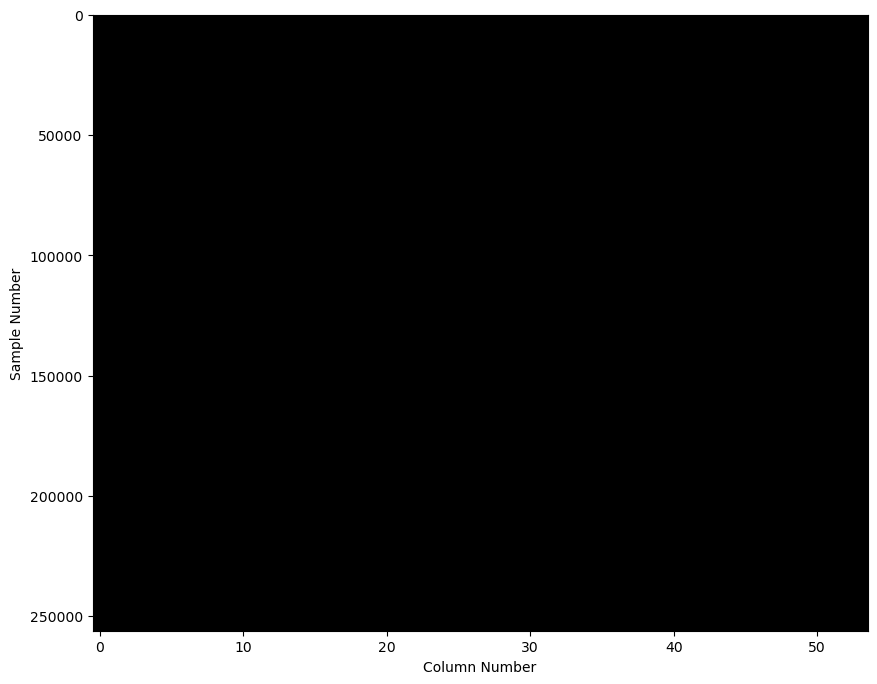

In [27]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
plt.imshow(df.isna(), aspect="auto", interpolation="nearest", cmap="gray")
plt.xlabel("Column Number")
plt.ylabel("Sample Number");

G:\Programme\Anaconda3\envs\DRL-SEPSIS\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


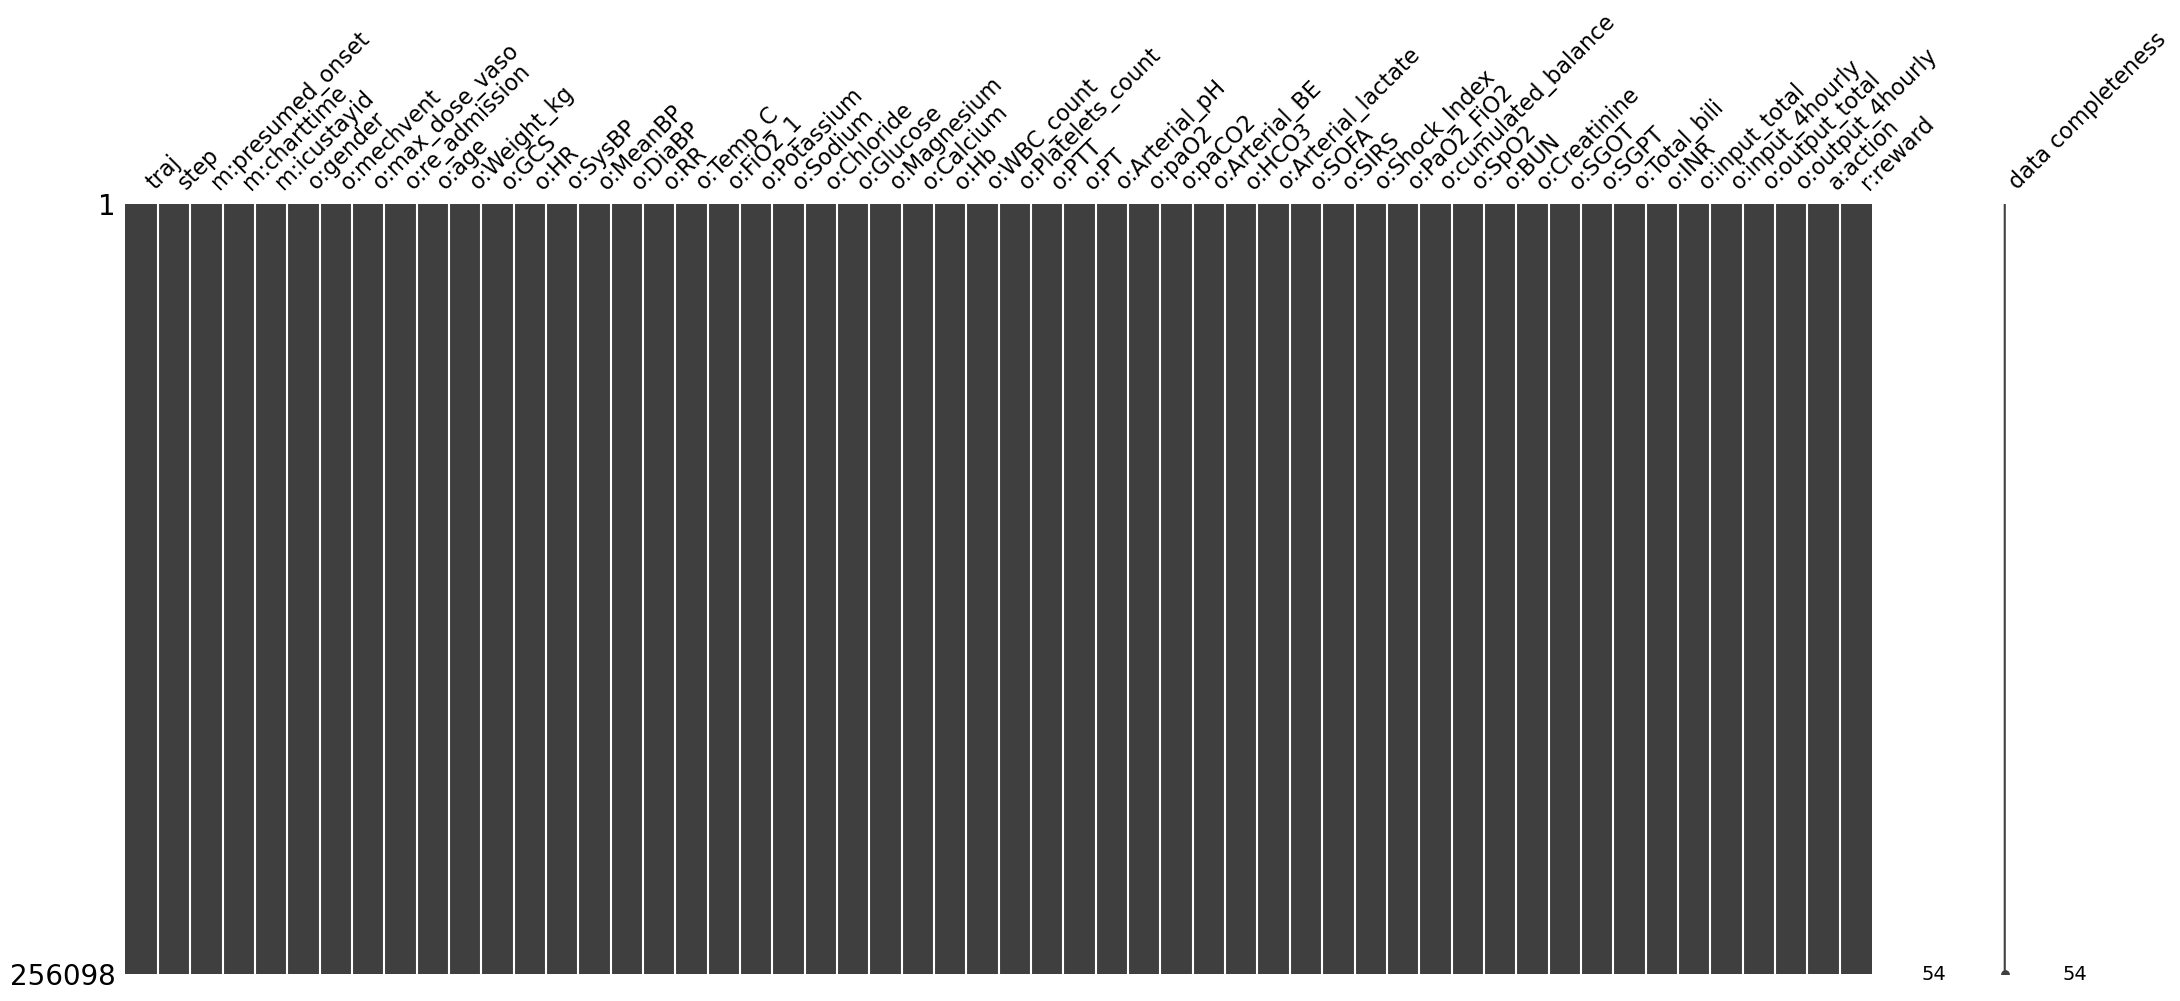

In [30]:
import missingno as msno

msno.matrix(df, labels=True, sort="descending");

In [32]:
print(df.shape)
df = df.dropna(thresh=df.shape[1] * 0.80, axis=0).reset_index(drop=True)
print(df.shape)

(256098, 54)
(256098, 54)


## Per Feature

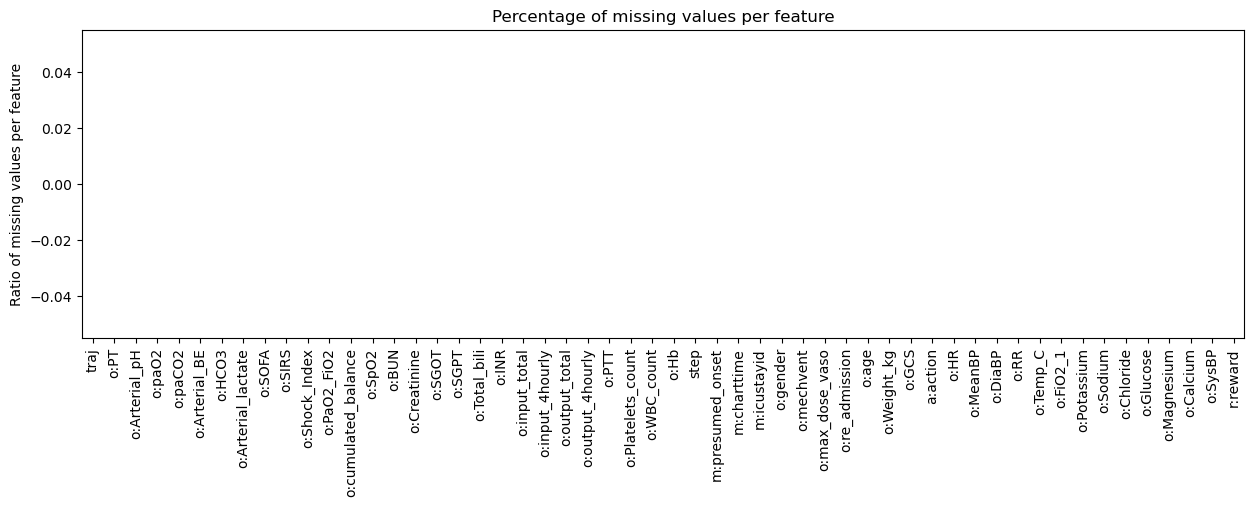

In [34]:
df.isna().mean().sort_values().plot(
    kind="bar", figsize=(15, 4),
    title="Percentage of missing values per feature",
    ylabel="Ratio of missing values per feature");

In [35]:
print(df.shape)
df = df.dropna(thresh=df.shape[0] * 0.85, axis=1)
print(df.shape)

(256098, 54)
(256098, 54)


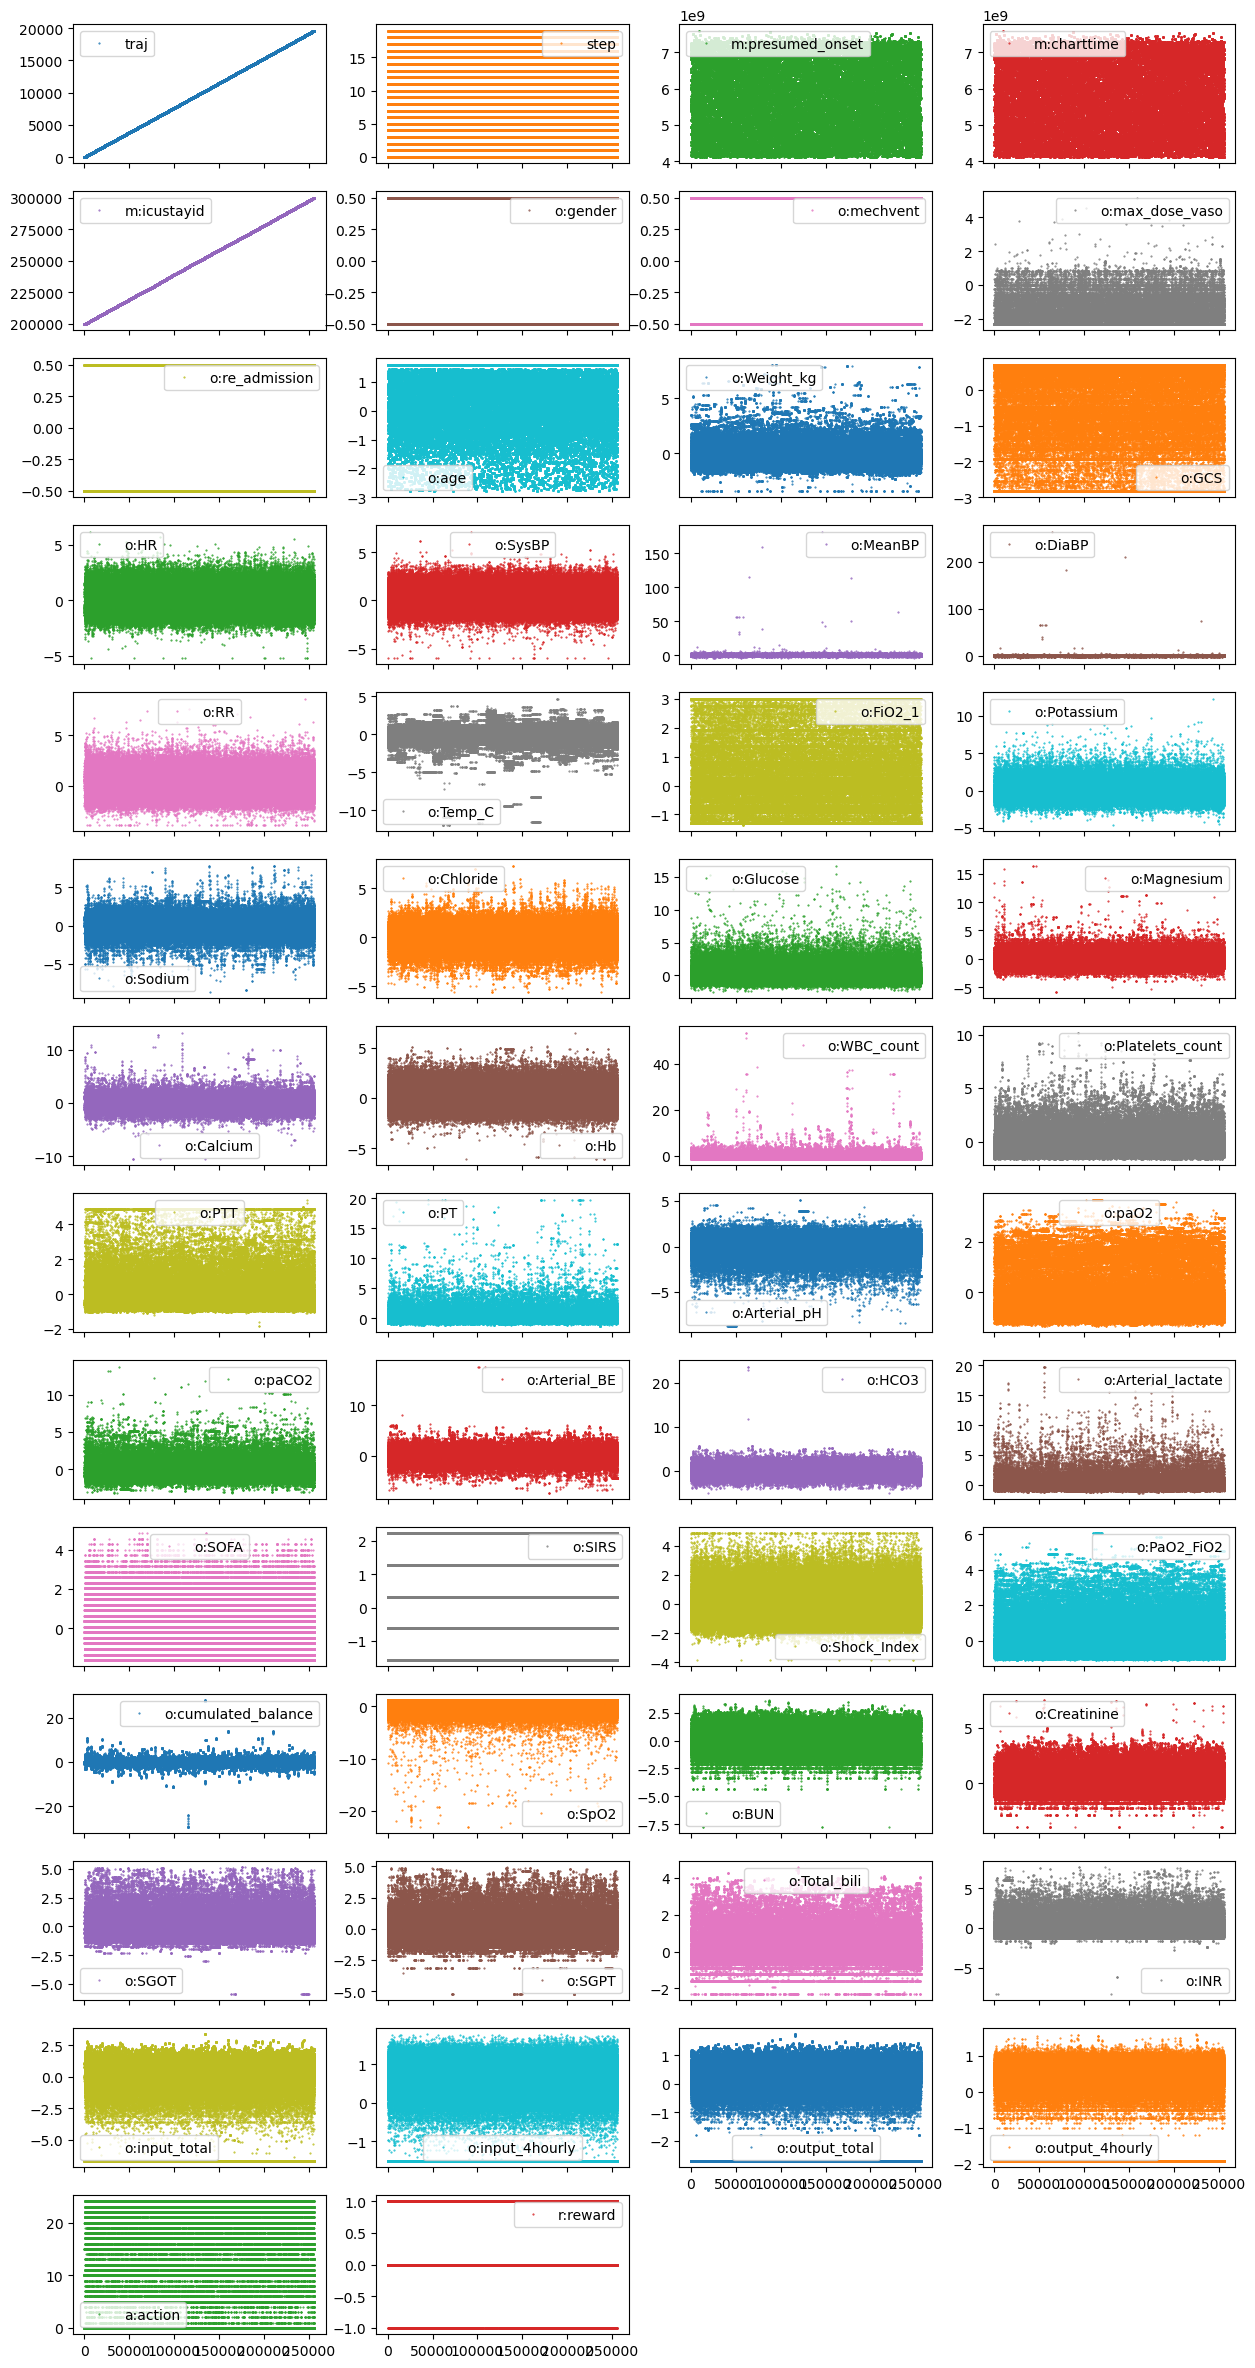

In [36]:
df.plot(lw=0,
          marker=".",
          subplots=True,
          layout=(-1, 4),
          figsize=(15, 30),
          markersize=1);

Having no NANs is suspicious allready, but looking at o:PTT and seeing a streigt line up there could be a sign for many missing values, that have been created for the NANs. Same goes for the input_total, input_4hourly and the similar output-tasks.

## Correlations

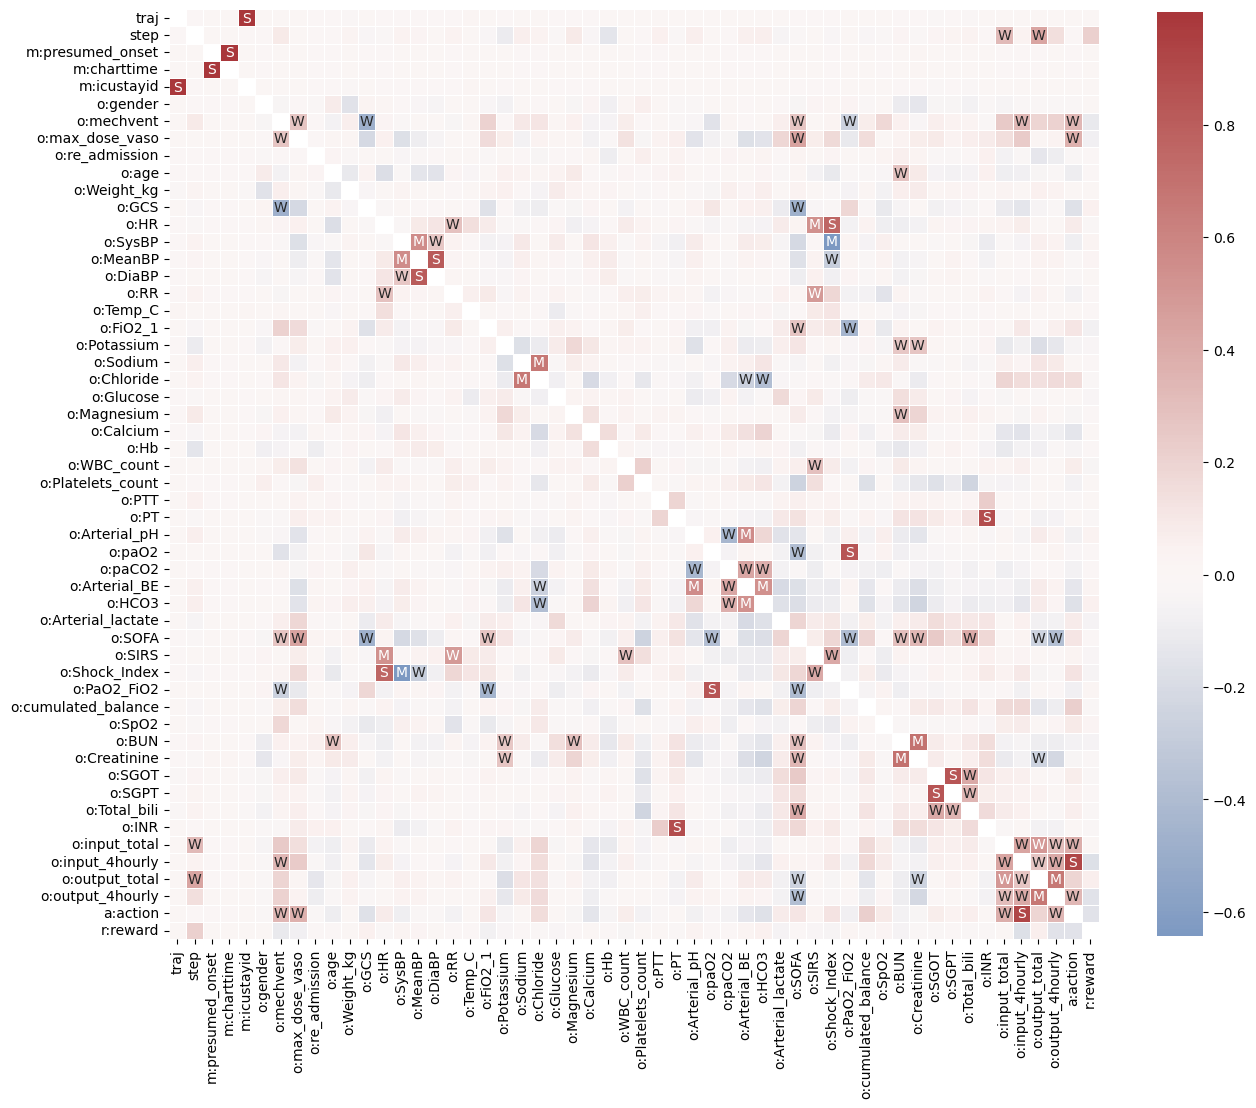

In [40]:
# Computes feature correlation
df_corr = df.corr(method="pearson")

# Create labels for the correlation matrix
labels = np.where(np.abs(df_corr)>0.75, "S", # STRONG
                  np.where(np.abs(df_corr)>0.5, "M", #MEDIUM
                  np.where(np.abs(df_corr)>0.25, "W", ""))) #WEAK

# Plot correlation matrix
plt.figure(figsize=(15, 15))
sns.heatmap(df_corr, mask=np.eye(len(df_corr)), square=True,
            center=0, annot=labels, fmt='', linewidths=.5,
            cmap="vlag", cbar_kws={"shrink": 0.8});

In [42]:
#  Creates a mask to remove the diagonal and the upper triangle.
lower_triangle_mask = np.tril(np.ones(df_corr.shape), k=-1).astype("bool")

#  Stack all correlations, after applying the mask
df_corr_stacked = df_corr.where(lower_triangle_mask).stack().sort_values()

#  Showing the lowest and highest correlations in the correlation matrix
display(df_corr_stacked)
         

o:Shock_Index  o:SysBP            -0.643361
o:GCS          o:mechvent         -0.478011
o:SOFA         o:GCS              -0.473477
o:PaO2_FiO2    o:FiO2_1           -0.445564
o:paCO2        o:Arterial_pH      -0.428847
                                     ...   
o:SGPT         o:SGOT              0.844649
o:INR          o:PT                0.890780
a:action       o:input_4hourly     0.921526
m:icustayid    traj                0.999989
m:charttime    m:presumed_onset    1.000000
Length: 1431, dtype: float64